# Coursera Capstone Project

## The Battle of Neighborhoods Buenos Aires Edition. (Week 2)

In [68]:
import os
import io
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd
import descartes
#import pysal as ps
import geopy ## To get the points for our neighborhoods
import folium

import requests # library to handle requests

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#Beatiful Soup
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup

# glob
import glob

# REGEX
import re

print("All packages imported")

All packages imported


## Brief description of Buenos Aires.


Buenos Aires, also known as Autonomous City of Buenos Aires, is the capital and largest city of Argentina with almost 3 million inhabitants (2,890,151 according to the 2010 census). The city is located on the western shore of the estuary of Río de la Plata, on the South American continent’s southeastern coast. The “Greater Buenos Aires” which includes also several Buenos Aires Province districts, constitutes the fourth-most popolus metropolitan area in the Americas, with a population of around 17 million, and one of the 20th biggest cities in the world. The city is historically divided into 48 barrios (neighborhoods) and a newer scheme has divided it into 15 comunas (communes) mainly for political elections purposes.  


Buenos Aires is a cosmopolitan city and it’s also well known for it’s preserved Eclectic European Architecture and rich cultural life.  Strongly influenced by European culture, Buenos Aires is sometimes referred to as the “Paris of South America”. The city has the busiest live theater industry in Latin America, and it’s the home the Teatro Colón, an internationally rated opera house. 


Buenos Aires is the financial, industrial and commercial hub of Argentina. The economy in the city proper alone, measured by Gross Geographic Product (adjusted for purchasing power), totaled US\\$84.7 billion (US\\$34,200 per capita) in 2011 and amounts to nearly a quarter of Argentina’s as a whole.


Football is a passion for Argentines. Buenos Aires has the highest concentration of football teams of any city in the world (featuring no fewer than 24 professional football teams), with many of it’s teams playing in the major league. The best-known rivalry is the one between River Plate and Boca Juniors (09/12/2018†), the match is better known as Superclásico. Watching a match between these two teams was deeemed one of the “50 sporting things you must do before you die” by The Observer. The best Superclásico ever was  the historically final of the Copa Libertadores Championship, held on Santiago Bernabeu stadium on the 9th of december of 2018. River Plate won  3-1 and was crowned as the Copa Libertadores Champion.


## 1. Problem description.
Since the city is very populous and Traffic is usually terribly heavy, specially on working hours, people who lives in the city often likes to be close to work. Also, having parks, pharmacies, coffee-shops on other stores around is usually considered a plus. Buenos Aires is a relatively safe city to live in, if you compare it with other cities in Argentina and Latin America, but that does not mean that you don’t have to worry about security. On the contrary, is a issue that can not be avoided when moving around the city and choosing a neighborhood where to live. 


Also rental prices are always a factor and there is much variation between neighborhoods.
For the purpose of moving to another neighborhood, you may need a first approach which could tell you where to start looking and make your search more straight forward. It would be great to have a report that can tell you which neighborhoods are most similar and which neighborhood meets your conditions the most. 


The aim of this report is to analyze the barrios of Buenos Aires city, so I can decide where to move since I ‘ve been ofered a new position as a Data Scientist. I would have to work at Núñez Neighborhood if I accept it and I currently live on Boedo with my wife and kid. My wife likes the idea to moving towards Núñez because she is familiar with the sorroundings, and she would have her friends and relatives closer. In order to move, I would have to find an apartment with the following aspects:
* Apartment with 2 bedrooms with monthly rent <= $50.000 Argentinan Pesos. 
* Apartment located within approximately 1 km from a subway station in Buenos Aires. I go to work by mororcycle, so I don't use the subway very often, but it's must when it rains or in the coldest days of winter.
* Neighborhood with low crime rate.
* Area with venues similar to the ones described for current location.
    
    
Also, I will group Neighborhoods into similar clusters. That information can be used to find out neighborhoods that are same as your current neighborhood or at least similar. This information would be useful for people who are interested in relocating to a different part of the city and are interested in finding new neighborhoods that have similar venues to the ones in their current neighborhood.

#### Interested Audience
I believe this is a relevant project for anyone who needs to move to Buenos Aires and gain some insights about the city. The approach and the methodologies used here are applicable to every city, given the data is gathered. The use of Open Data websites, FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. In addition, anyone interested in Data Science would benefict from this notebook by review the resolution of the problem step by step on the full code notebook: https://github.com/MMarcelo85/AppliedDScapstone-IBM-coursera/blob/master/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods%20Bs%20As%20edition%20-%20Full%20code.ipynb

## 2. Data Description. 


For this project we will use the data listed below:


**DATASETS**

1-  _Buenos Aires open data website_ (https://data.buenosaires.gob.ar/)

    A) barrios.csv  - Localization and geographical limits of city neighborhoods.
    B) bocas-de-subte.csv – subway entrances localization.
    C) delitos_2019.csv – Localization of each crime registered in the city in 2019.
    D) caba_pob_barrios_2010.csv – Population by Neighborhood.

2- _Mercadolibre_ (https://www.mercadolibre.com.ar)

    E) url0.csv to url24.csv – Since the Buenos Aires open data website has a data set about rental prices with more than 5000 missing values, it is useless for our purpose. To amend this we scrapped Mercadolibre web site and extracted with all the relevant information about two bedroom apartment rental notices in 25 csv files. 


3- _Open Street Data API_

    To request other data that can not be found in Buenos Aires Open Data website, like neighborhoods longitude and latitude coordinates.


4- _Foursquare API_

    To locate different venues for the analyzed neighborhoods.

### How the data was used to solve the problem
 
The first stage (Part Nº1) was about loading, cleaning and adding some variables to the data. I used Buenos Aires Open Data to build one data set for Buenos Aires Neighborhoods. Then I used Mercado Libre scrapped data to get the average Rental price per neighborhood and add it to the main data frame. Finally i did some exploratory analysis. I had saved all the generated datasets for backup and later use in Part Nº2. You can view this on the full notebook code link provided at the "interested audience" section. The code was mainly excluded due to its extension. Also, a good report should be clear and concise. The complete code of this project would attempt against these necessary characteristics in the report. 
 
After Data Wrangling was done, the data was used as follows: 
 
* I Used Foursquare and geopy data to map top 10 venues for all Buenos Aires neighborhoods.
 
* I Created 5 clusters for Buenos Aires Neighborhoods, analysed which Neighborhoods were candidates for me to move in and got some preliminary conclusions.
 
* I Created a map the apartments available for rental which meets my conditions. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
 

##### Current neighborhood of residence
I Currently reside in the neighborhood of 'Boedo' in Buenos Aires, about 10 minutes from downtown. 

I used Foursquare to identify the venues around my apartment,  which are then shown in the Buenos Aires map  in methodology section. It can be used as a reference for coparison with the map of the candidates Neighborhoods.

##### Data Required to resolve the problem

In order to map the apartments that are a good choice to move in by the described criteria (see problem description), the following data was required:

* List/Information on neighborhoods form Buenos Aires with their Geodata ( latitud and longitud). 

* List/Information about the subway metro stations in Buenos Aires with geodata.

* List about 2 bedrooms apartments for rent in Buenos Aires area with descriptions ( price, location, address and size in squared meters)

* Venues and ammenities in the Manhattan neighborhoods (e.g. top 10)

In order to get the latitude and longitude for each neighborhood I used the open maps API and added the variables to the dataset.

All the data had to be manipulated in order to get the data properly formatted (white spaces, types, etc)

Datasets from Buenos Aires open data had to be manipulated since there were inconsistencies between the variables of the datasets, such as different ways of naming neighborhoods not only by accents or upper or lower case letters, but also by the use of unofficial names for refering a Neighborhood or some part of it. 

Since official data about rental prices has to many missings, I decided that scraping the Mercado libre Website for rental prices of two bedroom apartments was the best approach in order to get the needed data. I used beatiful soup for scraping the website. First I needed to get the urls and then I made a function with two arguments(url, filename) that can scrape the data and save it to a csv file. Finally I loaded and concatenated all files in a single dataset with a simple function.


The consolidated dataset is called final_df. I added the following vars:

**Population:** _Total population for a given neighborhood._

**Total_delitos.** _Total crime for a given neighborhood._

**Delitos/Pob.** _Total crime/Population ratio for a given neighborhood._

**Size.** _Mean size for 2 bedroom apartments for a given neighborhood._

**Rent.** _Mean Rent(Monthly) for 2 bedroom apartments for a given neighborhood._

**Size.** _Mean Price per Squared meter for 2 bedroom apartments for a given neighborhood._

**Subway stations.** _Total number of subway stations for a given neighborhood_

With the Foursquare API I obtained the information of the nearby venues for each neighborhood and ordered the information creating a dataset with the most common venues by neighborhood, as in the course lab. The culsters were created and the best candidates were analyzed.

Finally I created two maps, one for my current location and the other to show the available apartments within the established criteria, and the subway stations. The latter has a tool to calculate distances.

## 3. Methodology section:

In this section I show the main components of the notebook. The strategy is based on mapping some of the above described data, in order to facilitate the choice of the candidate Neighborhoods and all the apartments that meet my criteria:

* Apartment with 2 bedrooms with monthly rent <= $50.000 Argentinan Pesos. 
* Apartment located within approximately 1 km from a subway station in Buenos Aires. I go to work by mororcycle, so I don't use the subway very often, but it's must when it rains or in the coldest days of winter.
* Neighborhood with low crime rate.
* Area with venues similar to the ones described for current location.
    

This visual approach with maps and popups labels allow quick identification of address and rental price, thus facilitating the process of searching and decideing.

## 3.1 - Brief analysis

In [11]:
final_df = pd.read_csv(r"./Data/final_df.csv")
rent_df = pd.read_csv(r"./Data/rent_df.csv")
crime = pd.read_csv(r"./Data/delitosxbarrio.csv")

In [27]:
print("The mean for the monthly rental price of a two bedroom apartment in Buenos Aires is {}.""\n""The median for the monthly rental price of a two bedroom apartment in Buenos Aires is {}.""\n""Our $50K budget is in between those two values. ".format(
rent_df["Rent"].mean().round(1),
rent_df["Rent"].median().round(1)))

The mean for the monthly rental price of a two bedroom apartment in Buenos Aires is 83717.7.
The median for the monthly rental price of a two bedroom apartment in Buenos Aires is 38000.0.
Our $50K budget is in between those two values. 


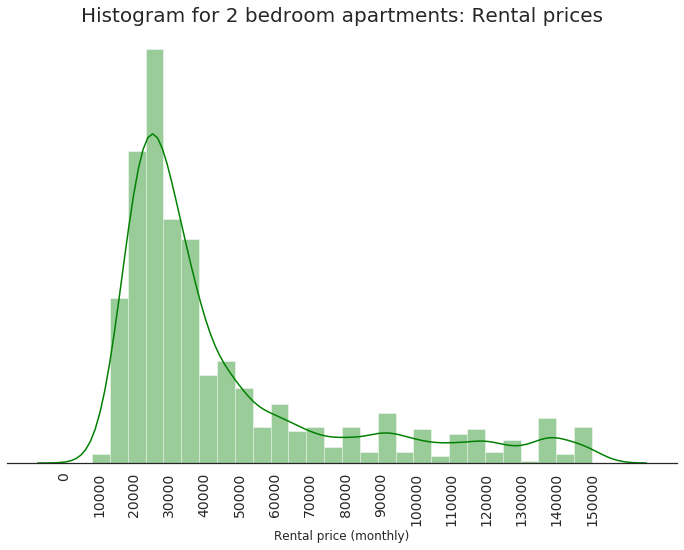

In [50]:
# Distribution plot Squared meter price for 2 bedroom apaprtment rental prices under 150000 Ars$ (published on Mercado Libre)
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
data = rent_df[rent_df['Rent']<= 150000]
sns.distplot(data.loc[:, "Rent"],kde=True, color="green", label="", ax=ax)
ax.set_title('Histogram for 2 bedroom apartments: Rental prices', fontsize=20)
ax.set_xlabel('Rental price (monthly)')
ax.spines['left'].set_visible(False) # Quitar eje izquierdo
ax.spines['right'].set_visible(False) # Quitar eje derecho
ax.spines['top'].set_visible(False) # Quitar eje superior
ax.axes.get_yaxis().set_visible(False) # Quitar valores eje y
ax.set_xticks(range(0,160000, 10000)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=90) # rotar labels y determinar tamaño de letra


plt.show()

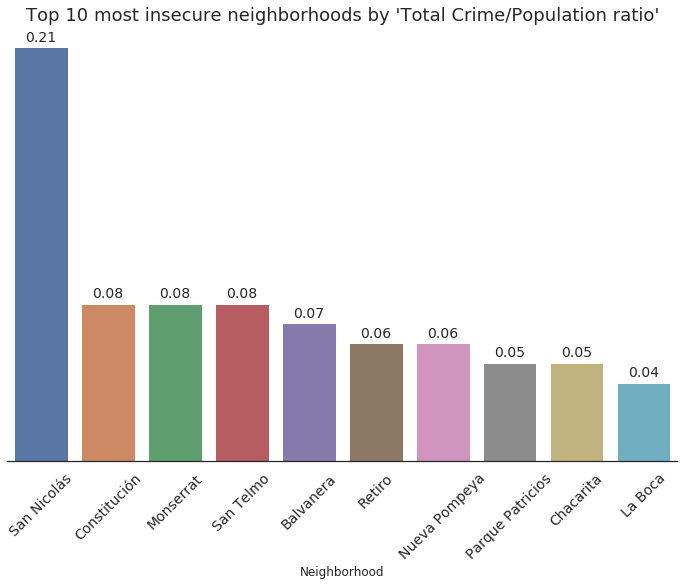

In [49]:
# Define fig
df_sorted = final_df.iloc[: ,[0,8]].sort_values(by='Delitos/Pob', ascending=False)
ax1 = df_sorted.iloc[0:10,[0,1]].plot(kind='bar', 
               figsize=(12, 8),
               width=0.8,
               fontsize = 14)

sns.set(style="white")

ax1.set_title("Top 10 most insecure neighborhoods by 'Total Crime/Population ratio'", fontsize = 18)
#ax1.legend(fontsize = 14)
ax1.legend().set_visible(False)
ax1.tick_params(labelsize=14, labelrotation=45)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

# Add the percentage values:    
for i in ax1.patches:
    ax1.annotate(np.round(i.get_height(),decimals=2), 
                (i.get_x()+i.get_width()/2., i.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

sns.barplot(x= df_sorted.iloc[0:10,0], y= df_sorted.iloc[0:10,1]) 
plt.show()

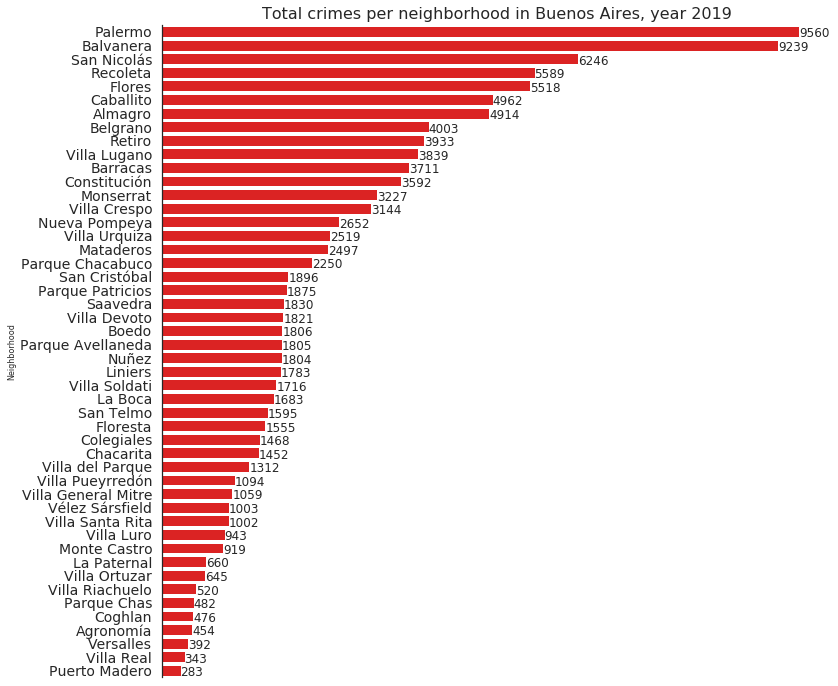

In [44]:
# This is a function to display values on horizontal bars
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# This is the plot
sns.set(style="white")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Load the example car crash dataset
data = crime.loc[:, ['Barrios','Cantidad']].sort_values(by="Cantidad", ascending=False)

# Plot the total crime
sns.set(style="darkgrid")
sns.barplot(x="Cantidad", y="Barrios", data=data,
            label="Median monthly rental prices", color="#F90505")

ax.set_title('Total crimes per neighborhood in Buenos Aires, year 2019', fontsize=16)
ax.set_ylabel('Neighborhood', fontsize=8)
ax.spines['bottom'].set_visible(False) # Quitar linea de eje x
ax.spines['right'].set_visible(False) # Quitar linea eje derecho
ax.spines['top'].set_visible(False) # Quitar linea eje superior
ax.axes.get_xaxis().set_visible(False) # Quitar valores eje x
#ax.set_xticks(range(0,11000, 1000)) # Establecer los valores que se desplegan en el eje x
ax.tick_params(labelsize=14, labelrotation=0) # rotar labels y determinar tamaño de letra

show_values_on_bars(ax, "h", 0.3)
plt.show()

## 3.2 - Getting venues, mapping and clustering

In [51]:
CLIENT_ID = 'QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT' # your Foursquare ID
CLIENT_SECRET = 'AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT
CLIENT_SECRET:AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE


In [52]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
Nom = Nominatim(user_agent='user_agent') #define user agent
from geopy.extra.rate_limiter import RateLimiter # Be a good user and respect the user agreement from open streets
geocode = RateLimiter(Nom.geocode, min_delay_seconds=1.5)

### Mapping my current home

In [55]:
#Get the latitude and Longitude for my actual apartment
country = 'Argentina'
city = "Ciudad de Buenos Aires"
barrio = 'Boedo'
address = 'Avenida Independencia 3600'
loc= Nom.geocode(city+','+ barrio+','+address)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)
print(loc.address)
#lista=[]
#for i in barrios['barrio']:
 #   loc=Nom.geocode(city+','+ barrio)
  #  list.append(loc)
#list
Boedo_Lat, Boedo_Long = loc.latitude, loc.longitude
print("\n")

print('The geographical coordinates of my current home at Buenos Aires are {}, {}.'.format(Boedo_Lat, Boedo_Long))

latitude is :- -34.621109 
longtitude is:- -58.4163306
MP3, Avenida Independencia, Boedo, Buenos Aires, Comuna 5, Ciudad Autónoma de Buenos Aires, C1126AAN, Argentina


The geographical coordinates of my current home at Buenos Aires are -34.621109, -58.4163306.


In [56]:
#Get the latitude and Longitude for Buenos Aires
BA_loc = Nom.geocode("Ciudad Autónoma de Buenos Aires")
BA_lat, BA_long = BA_loc.latitude, BA_loc.longitude
print('The geographical coordinate of Buenos Aires are {}, {}.'.format(BA_lat, BA_long))

The geographical coordinate of Buenos Aires are -34.6075682, -58.4370894.


In [57]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Boedo_Lat, 
    Boedo_Long, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QKCYGSSLP442NZDZ2DLFXUQDKESCSM0BAHFJPUPEQEIJAYQT&client_secret=AYH3ANHHDYOUE4LJAP43HZPNL5D33KWDMXVQAT4LDM0J3IRE&v=20180604&ll=-34.621109,-58.4163306&radius=500&limit=100'

In [58]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

In [59]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
venues = results['response']['groups'][0]['items']
my_venues = pd.json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
my_venues =my_venues.loc[:, filtered_columns]
# filter the category for each row
my_venues['venue.categories'] = my_venues.apply(get_category_type, axis=1)
# clean columns
my_venues.columns = [col.split(".")[-1] for col in my_venues.columns]

my_venues.shape

(24, 4)

### Map of my home sourroundings with venues within 500 mts.

In [66]:
latitude=Boedo_Lat
longitude=Boedo_Long
# create map of my home surroundings 
Boedo_map = folium.Map(location=[latitude, longitude], zoom_start=17)
# add markers to map
for lat, lng, label in zip(my_venues['lat'], my_venues['lng'], my_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=8,
        radius=5,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(Boedo_map)  
    
Boedo_map

### Buenos Aires neighborhoods normalized data with top 10 clustered venues.
Clusters was produced with normilized data from described sources and Foursquare data. A csv file was produced containing the 48 Buenos Aires neighborhoods. I load the data set to avoid overstretching the report. As I said before, the complete code can be seen in this repository through the link provided above

In [71]:
BA_merged=pd.read_csv("./Data/BA_merged.csv")
BA_merged.tail()

,Neighborhood,comuna,perimetro,area,Latitude,Longitude,poblacion,Total_delitos,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Belgrano,13,20609.78,1.365452,-34.561308,-58.456545,1.363216,0.747359,-0.460334,0.547239,0.859583,1.113830,0.596083,0,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Tea Room,Pizza Place,Vegetarian / Vegan Restaurant,Bookstore,Café,Pharmacy,Peruvian Restaurant
44,Recoleta,2,21452.84,0.754076,-34.587358,-58.391570,2.016699,1.505220,-0.103946,1.370623,1.237165,1.228444,1.359070,1,Hotel,French Restaurant,Italian Restaurant,Argentinian Restaurant,Plaza,Bakery,Ice Cream Shop,Brewery,Burger Joint,Bar
45,Retiro,1,18837.99,0.098145,-34.591643,-58.373307,0.107346,0.713909,0.608829,2.527402,2.416855,2.127692,1.359070,1,Hotel,Italian Restaurant,Plaza,Coffee Shop,Monument / Landmark,Café,Gym / Fitness Center,Cocktail Bar,Restaurant,Argentinian Restaurant
46,Núñez,13,10785.26,0.065972,-34.545348,-58.462149,-0.170516,-0.303421,-0.460334,0.087558,0.496336,1.112260,-0.548397,1,BBQ Joint,Argentinian Restaurant,Restaurant,Sports Club,Soccer Field,Brewery,Sushi Restaurant,Tennis Court,Plaza,Convenience Store
47,La Boca,4,20060.00,0.288441,-34.633510,-58.359042,-0.311594,-0.361240,-0.103946,-0.756032,-0.325259,-0.170083,-0.548397,1,Theater,Pizza Place,Bus Stop,Farmers Market,Argentinian Restaurant,Arts & Crafts Store,Seafood Restaurant,Italian Restaurant,Coffee Shop,Performing Arts Venue


# Let's draw the clusters on a map and inspect the one promissing cluster

In [75]:
# create map
kclusters = 5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BA_merged['Latitude'], BA_merged['Longitude'], BA_merged['Neighborhood'], BA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [77]:
BA_merged.loc[BA_merged['Cluster Labels'] == 0, BA_merged.columns[[0] + list(range(8, BA_merged.shape[1]))]].tail()

,Neighborhood,Delitos/Pob,Size,Rent,Price/Mts2,subway stations,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Boedo,-0.103946,-0.599437,-0.328754,-0.231315,-0.166903,0,Argentinian Restaurant,Soccer Field,Breakfast Spot,Ice Cream Shop,Intersection,Dessert Shop,Pizza Place,BBQ Joint,Event Space,Food & Drink Shop
23,Colegiales,-0.460334,0.324976,0.419360,0.403772,-0.548397,0,Pizza Place,Argentinian Restaurant,Gym,Brewery,Beer Bar,Café,Mexican Restaurant,Bus Station,Sports Club,South American Restaurant
26,Parque Chas,-0.460334,-0.589334,-0.376509,-0.341611,-0.548397,0,Plaza,BBQ Joint,Pizza Place,Café,Grocery Store,Electronics Store,Fish Market,Fast Food Restaurant,Farmers Market,Factory
35,Villa Soldati,-0.103946,-0.655003,-0.591229,-0.835786,-0.548397,0,Soccer Stadium,Bus Stop,Yoga Studio,Food Service,Flea Market,Fish Market,Fast Food Restaurant,Farmers Market,Factory,Event Space
43,Belgrano,-0.460334,0.547239,0.859583,1.113830,0.596083,0,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Tea Room,Pizza Place,Vegetarian / Vegan Restaurant,Bookstore,Café,Pharmacy,Peruvian Restaurant


##### Observing the characteristics of the clusters and their components, and being a native of Buenos Aires, I can draw some conclusions:

* The the large differences in public green spaces (plazas, parks, natural reserves, etc) between the neighborhoods of Buenos Aires were not reflected by the Foursquare API. This is probably due to its low use by the local public.


* More properties could be added to extend the characteristics of the neighborhoods and thus achieve a better classification. This would require intense data search and cleaning work, as well as web scraping, since the open data from Buenos Aires is scarce and of little granularity.


* Despite the above, clusters provide important information, such as high or low crime, and allow establishing a first approach to finding an apartment according to the conditions detailed above (Cluster 0  looks promising).

From the upper map we can se that there are 3 Neigborhoods in cluster 0 that are near to Núñez: Belgrano, Colegiales and Parque Chas.

Next we will have to subset our rent_df with to meet our conditions and then we wil get lat and lng for every address

In [112]:
rent_sub = rent_df[(rent_df["Neighborhood"] == "Boedo") | (rent_df["Neighborhood"] == "Colegiales") | (rent_df["Neighborhood"] == "Belgrano") | (rent_df["Neighborhood"] == "Parque Chas")] 
rent_sub.groupby(by="Neighborhood").mean().round(1)

,Size,Rent,Price/Mts2
Neighborhood,,,
Belgrano,80.8,66884.3,758.7
Boedo,58.1,24375.0,416.0
Colegiales,76.4,51136.6,577.8
Parque Chas,58.3,22666.7,387.9


We load the previously saved dataset for the available 2 bedroom apartments, with lat and lng for each one, and we set our price crieteria

In [120]:
C0_ = pd.read_csv("./Data/C0_.csv")
C0_.drop(columns="Unnamed: 0", inplace=True) # Forgot to set index=False whe saved it!
C0_["Neighborhood"].unique()

array(['Belgrano', 'Colegiales', 'Parque Chas'], dtype=object)

In [121]:
C0_=C0_[C0_["Rent"]<= 50000]
print("We have {} apartments that meet our price criteria.".format(C0_.shape[0]))

We have 58 apartments that meet our price criteria.


In [122]:
C0_.head()

,Size,Address,Neighborhood,Rent,Price/Mts2,Lat,Long,nom_address,coordinates
0,47,ZABALA 1700,Belgrano,25000.0,531.9,-34.563626,-58.442381,"ZABALA 1700 ,Belgrano,Ciudad de Buenos Aires","1700, Zabala, Bajo Belgrano, Belgrano, Buenos ..."
1,80,Virrey del Pino 2600,Belgrano,31000.0,387.5,-34.567494,-58.454598,"Virrey del Pino 2600 ,Belgrano,Ciudad de Buen...","2600, Virrey Del Pino, Colegiales, Buenos Aire..."
2,60,aguilar al 2500,Belgrano,20000.0,333.3,-34.559067,-58.458655,"aguilar al 2500 ,Belgrano,Ciudad de Buenos Aires","Aguilar, Blanco Encalada, Barrio Chino, Belgra..."
3,76,Moldes al 700,Belgrano,40000.0,526.3,-34.572434,-58.447547,"Moldes al 700 ,Belgrano,Ciudad de Buenos Aires","Moldes, Colegiales, Buenos Aires, Comuna 13, C..."
4,74,Moldes 2100,Belgrano,38000.0,513.5,-34.563827,-58.459404,"Moldes 2100 ,Belgrano,Ciudad de Buenos Aires","2100, Moldes, Belgrano R, Belgrano, Buenos Air..."


# 4. Results

#### Now I can plot the apartments and the subway stations to inspect and start looking for candidates apartments

In [124]:
subte=pd.read_csv("./Data/subte.csv")

In [131]:
# Buenos Aires map
latitude= BA_lat
longitude= BA_long 

BA_map_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(C0_['Lat'], C0_['Long'],'$ ' + C0_['Rent'].astype(str)+", "+ C0_['Address']+", "+ C0_["Size"].astype(str)+" Mts^2"):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(BA_map_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(subte['lat'], subte['long'],  subte['estacion'] ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='green',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(BA_map_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
BA_map_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(BA_map_rent)

BA_map_rent

# 4. Problem Resolution.

## Findings:  Interesting 2 bedrooms apartments to look on
**Belgrano Neighborhood:**

* \$30000, Virrey Arredondo al 2200 , 90 Mts^2, near José Hernández station (108 Mts)
* \$31000, Virrey del Pino 2600 , 80 Mts^2, near José Hernández station (273 Mts)
* \$36000, Jose Hernandez 2000 , 80 Mts^2, near José Hernández station (455 Mts)

**Colegiales Neighborhood:**

* \$2400, cramer 355 , 70 Mts^2, near Olleros station (948 Mts)
* \$25000, av de los Incas 4400 , 60 Mts^2, near José Hernández station (921 Mts)
* \$26000, Olleros 2454 , 58 Mts^2, near Olleros station (178 Mts)



Parque Chas is not interesting because since I am going to travel to Núñez, when I need to use the subway, I should go west, crossing half the city, to combine with line H, and then combine with line D to return east. Nor are the prices or dimensions of the apartments tempting in relation to those seen in Belgrano and Colegiales. The interesting apartments in these neighborhoods are well below the \$50000 Argentinian pesos limit.



They are ordered by lower price and coincidentally they are also ordered by proximity to the subway, with the exception of the apartment on Cramer Street. They are also ordered by larger size, although this was not a criterion. The "size" criterion was given by the number of bedrooms, in all cases dealing with two-bedroom apartments.

# 5. Discussion


Based on the results, I believe that clusters can be improved by incorporating more data and searching for the optimal k, but this will require intensive work, especially in cities where official data is not available or is scarce.

The creation of the map is a determining tool for achieving the objective.

Folium maps are a very powerful tool.


# 6. Final conclusion

As we observed previously, the three neighborhoods near Nuñez and the neighborhood in which I currently reside (Boedo) belong to the same cluster. Their similarity, since the creation of clusters is based on the creation of groups of homogeneous elements, was a good news since we are confident they have similar values on their features and similar venues. The data shows that there are more crimes in Boedo than in the three selected neighborhoods, although Colegiales and Belgrano have higher rental prices on average. The latter is not a problem since we established a maximum price criterion and I did find interesting apartments quite below that range.


Throughout this notebook I worked on the problem described and the proposed objective: Explore the neighborhoods of Buenos Aires, make clusters and map apartments for rent according to the criteria we established at the beginning. We achieved this with a lot of effort and dedication, especially in the data wrangling part, since the city data presented difficulties and shortcomings. We were able to do web scrapping to get rental prices and map the clusters, rental apartments and subway stations.

It has been a long but very rewarding project. I liked facing this project with my beloved city of Buenos Aires in mind and being able to apply much of what I have learned so far.

Finally I invite all readers to consult the complete code: 

**Limitations**

The ranking is based on few features and FourSquare API has few venues to offer to most of Buenos Aires Neighborhoods. 
